In [1]:
import numpy as np
from array import array
import os
import sys
import ROOT
from ROOT import TVectorD, TMatrix, TMath, TVector3, TGraphErrors, TFile, TTree, gRandom, gPad, gROOT, gVirtualX, kTRUE, kRed, TProfile, gStyle,  TFile, gSystem
from fastSimulation import *

Welcome to JupyROOT 6.22/02


Warning in <TClassTable::Add>: class ROOT::VecOps::RVec<int> already in TClassTable
Warning in <TClassTable::Add>: class ROOT::VecOps::RVec<float> already in TClassTable


# Reading the files

In [2]:
folder="${fastMCKalmanOptTesting}/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/"
#folder="/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCSA/"
inputData = folder+"fastParticle.list"
ROOT.initTreeFast(inputData)
tree=ROOT.treeFast
treeSeed = ROOT.treeSeed


Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root


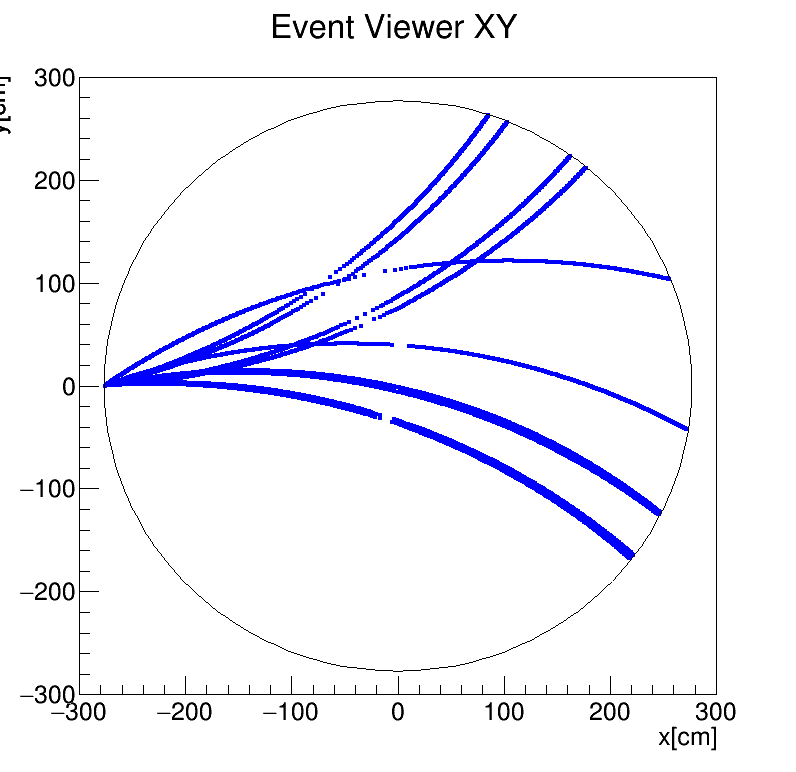

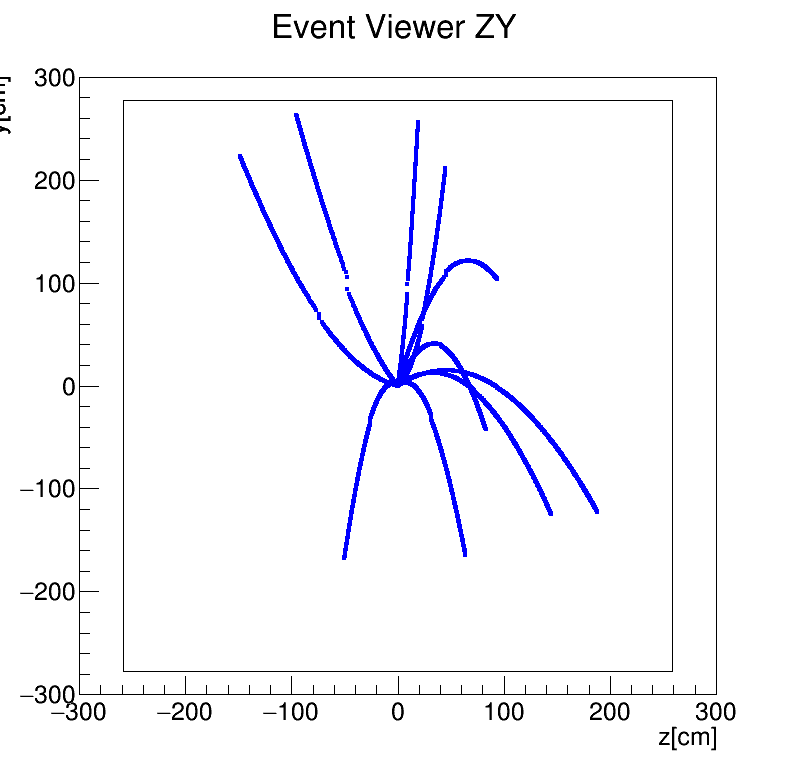

In [3]:
#hXY = ROOT.TH2D("hdist","hdist",800,-400,400,800,-400,400)
x = array('d')
y = array('d')
z = array('d')

for iev in range(10):
    tree.GetEntry(iev)
    #print("entry number: ",str(iev))
    if (tree.part.fStatusMaskIn[1]!=31 or tree.part.fParamMC.size()==0): continue



    

    for i in range(tree.part.fParamMC.size()-1):
        xyz = [tree.part.fParamMC[i].GetX(),tree.part.fParamMC[i].GetParameter()[0],tree.part.fParamMC[i].GetParameter()[1]]
        alpha = tree.part.fParamMC[i].GetAlpha()
        xyz_gl = [xyz[0]*np.cos(alpha)-xyz[1]*np.sin(alpha), xyz[0]*np.sin(alpha)+xyz[1]*np.cos(alpha), xyz[2]]
        #if(tree.part.fLoop[i]==1): break
        x.append(xyz_gl[0])
        y.append(xyz_gl[1])
        z.append(xyz_gl[2])
        #if(iev==1):print(x[i])

    


graph = ROOT.TGraph(len(x),x,y)


hq = ROOT.TCanvas("hq","hq",800,800)
graph.SetTitle("Event Viewer XY;x[cm];y[cm]")
graph.SetMarkerColor(4)
graph.SetMarkerSize(0.5)
graph.SetMarkerStyle(21)         
graph.GetHistogram().SetMinimum(-300)  #   Y
graph.GetHistogram().SetMaximum(300)   #   Y
graph.GetXaxis().SetLimits(-300,300)   #   X
el1 = ROOT.TEllipse(0,0,277,277)
el1.SetFillStyle(0)
graph.Draw("AP")
el1.Draw("same")
hq.Draw()

graphz = ROOT.TGraph(len(z),z,y)


hq2 = ROOT.TCanvas("hq2","hq2",800,800)
graphz.SetTitle("Event Viewer ZY;z[cm];y[cm]")
graphz.SetMarkerColor(4)
graphz.SetMarkerSize(0.5)
graphz.SetMarkerStyle(21)         
graphz.GetHistogram().SetMinimum(-300)  #   Y
graphz.GetHistogram().SetMaximum(300)   #   Y
graphz.GetXaxis().SetLimits(-300,300)   #   X
box1=ROOT.TBox(-259,-277,259,277)
box1.SetFillStyle(0)
graphz.Draw("AP")
box1.Draw("same")
hq2.Draw()



        
        